<a href="https://colab.research.google.com/github/dwmhr12/Python/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Dewi Maharani
- **Email:** dewimaharani170104@gmail.com
- **ID Dicoding:** Dewi Maharani


## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi jumlah total penyewa sepeda berdasarkan musim?
- Bagaimana hubungan antara suhu dan jumlah total penyewaan sepeda?


## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install numpy pandas scipy matplotlib seaborn
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
print("Semua library berhasil diimpor!")

Semua library berhasil diimpor!


## Data Wrangling

### Gathering Data

In [ ]:
#Membuat tabel Day
Day_df = pd.read_csv("https://raw.githubusercontent.com/dwmhr12/data/main/day.csv")
Day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Membuat tabel Hour
Hour_df = pd.read_csv("https://raw.githubusercontent.com/dwmhr12/data/main/hour.csv")
Hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Code tersebut bertujuan untuk mengimpor dua datasett (data harian dan data jam ) dari lokasi GitHub ke Python
- Dataset day.csv berisi data tingkat harian, sementara hour.csv berisi data tingkat jam


### Assessing Data

In [ ]:
#Menilai Data Day_df
Day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
Day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah Duplikasi: ", Day_df.duplicated().sum() )

Jumlah Duplikasi:  0


In [ ]:
#Memeriksa Parameter
Day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
#Menilai Data Hour_df
Hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
print("Jumlah Dupplikasi: ", Hour_df.duplicated().sum())

Jumlah Dupplikasi:  0


In [ ]:
Hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
Hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Telah dilakukan Assesing data pada data Day_df didapat bahwa kolom dteday yang bertipe data object seharusnya menjadi date, dan kolom holiday yang bertipe data int64 harusnya boolean
- Pada Data Hour_df juga didapat bahwa kolom dteday memiliki tipe data object yang seharusnya date, dan kolom holiday yang bbertipe data int tetapi seharusnya bool
- Ketika dilakukan pengecekan mengenai duplikasi data diadapatkan hasil bahwa kedua data tersebut tidak mempunyai duplicated
- Dan kedua data tersebut tidak memiliiki missing value

### Cleaning Data

In [ ]:
Day_df['dteday']=pd.to_datetime(Day_df["dteday"])
Day_df['holiday']=Day_df['holiday'].astype('bool')
Day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    bool          
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: bool(1), datetime64[ns]

In [ ]:
Hour_df['dteday'] = pd.to_datetime(Hour_df['dteday'])
Hour_df['holiday']=Hour_df['holiday'].astype('bool')
Hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  bool          
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Telah mengubah tipe data pada data Day_df pada kolom dteday dan holiday
- Telah mengubah tipe data pada data Hour_df pada kolom dteday dan holiday

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
#Eksplorasi Data Day_df
Day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,NaN,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,NaN,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,NaN,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,NaN,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,NaN,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,NaN,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
pivot_season = Day_df.pivot_table(index='season', values='cnt', aggfunc=['mean', 'median', 'max', 'min'])

In [ ]:
print(pivot_season)

               mean  median   max   min
                cnt     cnt   cnt   cnt
season                                 
1       2604.132597  2209.0  7836   431
2       4992.331522  4941.5  8362   795
3       5644.303191  5353.5  8714  1115
4       4728.162921  4634.5  8555    22


In [ ]:
Day_df['temp_bins']= pd.cut(Day_df['temp'], bins=5, labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'] )

In [ ]:
pivot_temp = Day_df.pivot_table(
    index='temp_bins',
    values='cnt',
    aggfunc=['mean', 'median', 'count']
)

print(pivot_temp)

                  mean  median count
                   cnt     cnt   cnt
temp_bins                           
Very Low   1571.162791  1501.0    43
Low        3152.015464  3192.0   194
Moderate   4585.797688  4521.0   173
High       5674.958763  5384.0   194
Very High  5664.118110  5531.0   127


<ipython-input-28-a1fd07f6460b>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_temp = Day_df.pivot_table(
<ipython-input-28-a1fd07f6460b>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_temp = Day_df.pivot_table(
<ipython-input-28-a1fd07f6460b>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_temp = Day_df.pivot_table(


**Insight:**
- Musim Fall dan Summer cenderung menunjukkan jumlah penyewaan sepeda yang lebih tinggi dibandingkan musim lainnya
- Penyewaan sepeda cenderung lebih tinggi pada suhu tinggi

## Visualization & Explanatory Analysis

### Pertanyaan 1:

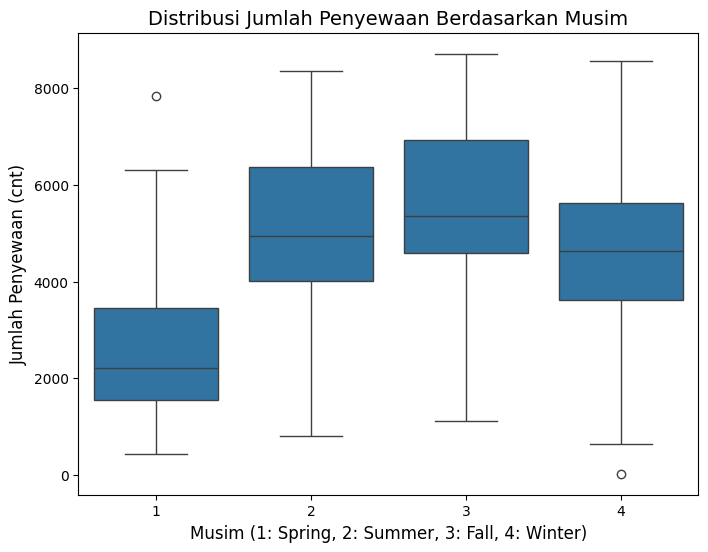

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=Day_df, x='season', y='cnt')
plt.title('Distribusi Jumlah Penyewaan Berdasarkan Musim', fontsize=14)
plt.xlabel('Musim (1: Spring, 2: Summer, 3: Fall, 4: Winter)', fontsize=12)
plt.ylabel('Jumlah Penyewaan (cnt)', fontsize=12)
plt.show()


### Pertanyaan 2:

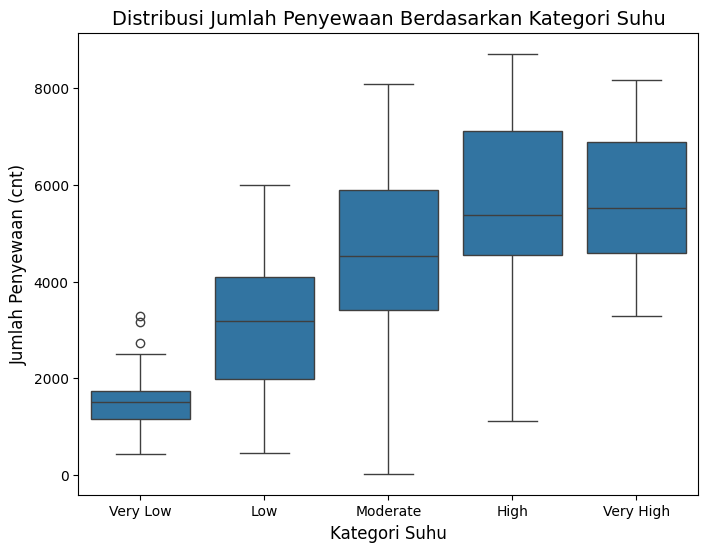

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=Day_df, x='temp_bins', y='cnt')
plt.title('Distribusi Jumlah Penyewaan Berdasarkan Kategori Suhu', fontsize=14)
plt.xlabel('Kategori Suhu', fontsize=12)
plt.ylabel('Jumlah Penyewaan (cnt)', fontsize=12)
plt.show()

**Insight:**
- Berdasarkan boxplot yang telah dibuat, dapat disimpulkan bahwa penyewaan sepeda cenderung lebih tinggi pada musim fall dan suhu high dan very high
- Pada musim Winter dan suhu Very Low, penyewaan lebih rendah. Rentang nilai IQR di musim Fall dan kategori suhu High lebih besar, menunjukkan adanya variasi yang lebih tinggi dalam jumlah penyewaan

## Analisis Lanjutan (Opsional)

## Conclusion

- Musim Fall dan Summer cenderung menunjukkan jumlah penyewaan sepeda yang lebih tinggi dibandingkan musim lainnya. Untuk pengelola sistem sepeda berbagi bisa memfokuskan promosi atau insentif pada musfim fall dan summer
- Penyewaan sepeda cenderung lebih tinggi pada suhu yang lebih tinggi. Untuk memanfaatkan lonjakan penyewaan seoeda pada suhu yang lebih tinggii, pengelola sepeda bisa meningkatkan jumlah sepeda yang tersedua selama musim panad dan memastikan lokasi penyewaan mudah diakses di area yang sering dikunjungi oleh pengendara sepeda'


In [ ]:
# Jika Anda ingin menggabungkan Day_df dan Hour_df
all_df = pd.concat([Day_df, Hour_df], axis=0)

# Menyimpan data yang sudah dibersihkan ke dalam file CSV
all_df.to_csv("Bike_Sharing_Cleaned.csv", index=False)

Link to Dashboard : https://github.com/dwmhr12/Dashboard.git